: 

plot model func

In [ ]:
2**2

'0b1111111111111111111111111111111111111111111111111111111111111111'

4

gradient descent

basically find the slope to find a way to maximise or minimise

back propagation used to calculate error contribution of each neuron after a batch of data ir processed, needs a known desired output 



In [22]:
import numpy as np
from numpy import genfromtxt

In [86]:
data= genfromtxt(r'D:\zaynu\Documents\pythonfiles\CV_mod\Computer-Vision-with-Python\DATA\bank_note_data.txt',delimiter=',')
print (data)

[[  3.6216    8.6661   -2.8073   -0.44699   0.     ]
 [  4.5459    8.1674   -2.4586   -1.4621    0.     ]
 [  3.866    -2.6383    1.9242    0.10645   0.     ]
 ...
 [ -3.7503  -13.4586   17.5932   -2.7771    1.     ]
 [ -3.5637   -8.3827   12.393    -1.2823    1.     ]
 [ -2.5419   -0.65804   2.6842    1.1952    1.     ]]


D:\zaynu\Documents\pythonfiles\CV_mod\Computer-Vision-with-Python\DATA\bank_note_data.txt

In [87]:
labels=data[:,4]
features=data[:,:4]


In [88]:
from sklearn.model_selection import train_test_split
X=features
y=labels

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#randomstate is kinda like the suffle seed , 42 is default cause of dumb joke


In [90]:
print(y_test)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0.
 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1.
 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0.
 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0.
 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0.
 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1.
 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0.

In [6]:
from sklearn.preprocessing import MinMaxScaler

#minmax scaler usd when the values  of the min and max of the X test vals are VERY DIFF
#eg since here max is 17 and min is -13 there isnt much difference  so no need

In [7]:
scaler_obj=MinMaxScaler()

In [8]:
scaler_obj.fit(X_train)


MinMaxScaler()

In [9]:
scaled_xtrain=scaler_obj.transform(X_train)
scaled_xtest=scaler_obj.transform(X_test)

In [10]:
scaled_xtrain.max()

1.0000000000000002

In [11]:
scaled_xtrain.min()

0.0

In [12]:
from keras.models import Sequential
from keras.layers import Dense


In [13]:
model= Sequential()
model.add(Dense(4,input_dim=4,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

c:\Users\zaynu\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [22]:
model.fit(scaled_xtrain,y_train,epochs=150,verbose=2)


Epoch 1/150
29/29 - 0s - 4ms/step - accuracy: 0.9880 - loss: 0.0254
Epoch 2/150
29/29 - 0s - 4ms/step - accuracy: 0.9913 - loss: 0.0246
Epoch 3/150
29/29 - 0s - 4ms/step - accuracy: 0.9869 - loss: 0.0248
Epoch 4/150
29/29 - 0s - 4ms/step - accuracy: 0.9902 - loss: 0.0249
Epoch 5/150
29/29 - 0s - 4ms/step - accuracy: 0.9869 - loss: 0.0268
Epoch 6/150
29/29 - 0s - 4ms/step - accuracy: 0.9902 - loss: 0.0249
Epoch 7/150
29/29 - 0s - 4ms/step - accuracy: 0.9913 - loss: 0.0244
Epoch 8/150
29/29 - 0s - 4ms/step - accuracy: 0.9913 - loss: 0.0248
Epoch 9/150
29/29 - 0s - 4ms/step - accuracy: 0.9880 - loss: 0.0243
Epoch 10/150
29/29 - 0s - 4ms/step - accuracy: 0.9902 - loss: 0.0248
Epoch 11/150
29/29 - 0s - 4ms/step - accuracy: 0.9869 - loss: 0.0253
Epoch 12/150
29/29 - 0s - 4ms/step - accuracy: 0.9902 - loss: 0.0261
Epoch 13/150
29/29 - 0s - 4ms/step - accuracy: 0.9869 - loss: 0.0242
Epoch 14/150
29/29 - 0s - 4ms/step - accuracy: 0.9913 - loss: 0.0246
Epoch 15/150
29/29 - 0s - 4ms/step - accura

In [26]:
predictions=model.predict(scaled_xtrain)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [18]:
# print(len(precictions))
# print(np.int32((precictions>0.5)))

In [17]:
from sklearn.metrics import confusion_matrix,classification_report

In [82]:
print(y_test)

[7 2 1 ... 4 5 6]


In [29]:
confusion_matrix(y_train,np.int32((predictions>0.5)))


array([[498,   7],
       [  5, 409]], dtype=int64)

In [25]:
print(classification_report(y_test,np.int32((predictions>0.5))))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       257
         1.0       0.98      0.99      0.99       196

    accuracy                           0.99       453
   macro avg       0.99      0.99      0.99       453
weighted avg       0.99      0.99      0.99       453



In [24]:
from keras import saving
# model.save(r"D:\zaynu\Documents\pythonfiles\CV_mod\mlmodels\moneymodel.h5")
saving.save_model(model, r"D:\zaynu\Documents\pythonfiles\CV_mod\mlmodels\moneymodel.keras")


In [25]:
from keras.models import load_model
newmodel=load_model( r"D:\zaynu\Documents\pythonfiles\CV_mod\mlmodels\moneymodel.keras")


c:\Users\zaynu\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
predictions=newmodel.predict(scaled_xtest)
print()
confusion_matrix(y_test,(predictions>0.5))

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


array([[251,   6],
       [ 10, 186]], dtype=int64)

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline


                                                                        MNST

has images of  handwritten nmbers 
each image is normalised aznd grey so the values are from 0-1 instead of 0-255

think of the group of images as a 4d array
shape is (60000 ,28,28,1)

it has onehot encoding
if origninal labels of images are 
[ 1 ,2 ,3, 7, 8]

convert to one hot
eg
[0,1,0,0,0,0,0,0,0] is 1

hence ytrain shape is (60_000,10)

Convlutional neural netwroks 

each neuron only looks and intracts wit local neurons

filers : no possible outputs sorta? no possible things to filter into eg filter 2 is 1 or 0   
filter size: no of weights
stride: evry how many neuron is filter

1 x L is 1D convoolution filtwer is a tensor whic his filter count x no of units

2D convolutoon is inoput is H,W 
tensor is nofilter * no of units for width * no of units for height

local area of the input image relates to a local area to the tensor

pooling layers will subsample the input reducin memoryusage
and computer usage

make a pool of pixels and only the max val goes thru and hencethe max value represents the pool
then u move over by a "stride"

pooling layer removes a lot of info



another thinf done is dropping to avoid overfitting and over acustomisation 

 

In [91]:
from keras.datasets import mnist


In [92]:
(X_train,y_train),(X_test,y_test )=mnist.load_data()

In [93]:
X_train.shape


(60000, 28, 28)

In [94]:
Si=X_train[0]


In [95]:
def showimg(img):
    plt.imshow(img,cmap='gray_r')
    plt.show()
showimg(Si)

NameError: name 'plt' is not defined

In [96]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [97]:
from keras.utils import to_categorical

In [98]:
y_cat_test=to_categorical(y_test,10)
y_cat_train=to_categorical(y_train,10)

In [99]:
y_cat_train[0] 

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [100]:
#normalising the train dat
X_train= X_train/255


In [101]:
X_test= X_test/255


In [102]:
scaledimg=X_train[0]
print(scaledimg)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [103]:
X_train=X_train.reshape(60000,28,28,1)
X_test=X_test.reshape(10000,28,28,1)


In [104]:
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Input

In [105]:
model=Sequential()
model.add(Input(shape=(28,28,1)))
model.add(Conv2D(filters=32,kernel_size=(4,4),activation='relu' ))
# model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu' ))
#pooling
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])


In [50]:
# import numpy as np
# X_train=np.vstack((X_train,X_train[0:2]))

# y_cat_train=np.vstack((y_cat_train,y_cat_train[0:2]))
# # print(X_train.shape)
# print(y_cat_train.shape)



In [106]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 25, 25, 32)     │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,183,018 (4.51 MB)

 Trainable params: 1,183,018 (4.51 MB)

 Non-trainable params: 0 (0.00 B)

In [107]:
# model.fit(X_train[0:len(X_train)//2],y_cat_train[0:len(y_cat_train)//2],epochs=2)
model.fit(X_train,y_cat_train,epochs=2)
#1875

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9201 - loss: 0.2604
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9853 - loss: 0.0473


In [30]:
print(X_train.shape)
print(X_train[0:2].shape)
# y_cat_train.shape


(60000, 28, 28, 1)
(2, 28, 28, 1)


In [37]:
m1=np.arange(1,5).reshape(2,2)
m2=np.arange(5,9).reshape(2,2)
print(m1.shape,m1[0].shape)
m3=np.vstack([m1,m1[0]])
print(m3)

(2, 2) (2,)
[[1 2]
 [3 4]
 [1 2]]


In [53]:
model.evaluate(X_test,y_cat_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9837 - loss: 0.0453


[0.03703990951180458, 0.9873999953269958]

In [131]:
n=9.9999630e-01
print(f"{n:.20f}")

0.99999629999999994912


In [142]:
from sklearn.metrics import classification_report
predictions=model.predict(X_test)
OH_predicts=np.int32(predictions>0.3)
OH_predicts[0]
mainpredicts=np.array([i.argmax() for i in predictions])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [143]:
len(y_test)
print(classification_report(y_test,mainpredicts))

# np.int32(predictions>0.5) 
#

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [1]:
#CIFAR
from keras.datasets import cifar10

In [2]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 554s 3us/step


In [3]:
x_train=x_train/255
x_test=x_test/255

In [4]:
from keras.utils import to_categorical
y_cat_train=to_categorical(y_train,10)
y_cat_test=to_categorical(y_test,10)

In [1]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Input

In [2]:
# netkmit@456#

In [3]:
model=Sequential()
model.add(Input(shape=(32,32,3)))
model.add(Conv2D(filters=32,kernel_size=(4,4),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=32,kernel_size=(4,4),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [ ]:


model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 29, 29, 32)     │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       205,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,610 (881.29 KB)

 Trainable params: 225,610 (881.29 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
from keras.utils import plot_model
import matplotlib.pyplot as plt
%matplotlib inline
plot_model(model,show_shapes=True,show_layer_names=True,to_file=r'D:\zaynu\Documents\pythonfiles\CV_mod\mlmodels\cifar_model.jpg')

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [ ]:
model.fit(x_train,y_cat_train,verbose=1,epochs=10)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.3590 - loss: 1.7695
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5695 - loss: 1.2258
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6342 - loss: 1.0438
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6837 - loss: 0.9160
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7189 - loss: 0.8147
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7484 - loss: 0.7358
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7680 - loss: 0.6713
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7874 - loss: 0.6194
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7999 - loss: 0.5870
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8163 - loss: 0.5457


In [11]:
model.evaluate(x_test,y_cat_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6759 - loss: 1.1847


[1.2126041650772095, 0.671999990940094]

In [12]:
from sklearn.metrics import classification_report
predictions=model.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [21]:
import numpy as np
numpredicts=[i.argmax() for i in np.int32(predictions>0.5)]
print(numpredicts)


[3, 0, 8, 0, 4, 6, 0, 6, 3, 1, 0, 9, 3, 7, 9, 8, 5, 7, 0, 6, 7, 2, 4, 9, 4, 4, 4, 2, 1, 6, 6, 5, 2, 3, 9, 3, 4, 1, 9, 5, 4, 6, 3, 6, 0, 9, 2, 0, 7, 6, 7, 8, 2, 3, 8, 0, 3, 0, 5, 3, 7, 5, 6, 3, 6, 2, 1, 2, 3, 7, 0, 6, 8, 8, 0, 2, 2, 3, 3, 8, 8, 1, 1, 7, 2, 7, 2, 0, 0, 9, 0, 0, 8, 6, 4, 6, 6, 0, 0, 7, 0, 7, 6, 3, 1, 1, 3, 6, 3, 7, 0, 0, 2, 2, 0, 3, 0, 4, 3, 5, 8, 3, 1, 2, 8, 2, 0, 3, 3, 0, 4, 1, 8, 9, 1, 2, 9, 7, 2, 0, 3, 5, 6, 3, 8, 0, 6, 0, 3, 2, 0, 0, 6, 0, 0, 3, 2, 9, 3, 4, 3, 1, 0, 6, 0, 4, 8, 6, 7, 8, 9, 6, 0, 0, 1, 9, 3, 7, 3, 0, 0, 5, 2, 3, 5, 8, 6, 3, 3, 8, 4, 8, 7, 0, 4, 0, 8, 8, 3, 3, 3, 0, 8, 7, 1, 3, 0, 5, 7, 9, 0, 4, 3, 9, 8, 0, 4, 9, 8, 2, 7, 0, 9, 3, 3, 1, 2, 2, 3, 6, 5, 1, 3, 1, 8, 0, 4, 2, 3, 3, 1, 1, 8, 3, 0, 2, 1, 8, 2, 3, 5, 3, 9, 9, 0, 0, 6, 0, 8, 9, 8, 1, 3, 3, 8, 8, 0, 4, 7, 0, 0, 5, 6, 3, 8, 3, 0, 3, 2, 7, 0, 8, 3, 1, 0, 9, 1, 8, 7, 9, 1, 2, 6, 9, 3, 2, 6, 0, 0, 6, 6, 6, 3, 0, 2, 8, 3, 2, 9, 4, 8, 6, 0, 0, 0, 3, 2, 7, 5, 5, 3, 3, 0, 2, 7, 0, 7, 5, 4, 6, 1, 9, 0, 

In [22]:
print(classification_report(y_test,numpredicts))

              precision    recall  f1-score   support

           0       0.39      0.79      0.52      1000
           1       0.81      0.80      0.81      1000
           2       0.61      0.58      0.59      1000
           3       0.43      0.62      0.51      1000
           4       0.72      0.56      0.63      1000
           5       0.71      0.42      0.53      1000
           6       0.84      0.71      0.77      1000
           7       0.81      0.67      0.73      1000
           8       0.79      0.77      0.78      1000
           9       0.93      0.54      0.68      1000

    accuracy                           0.65     10000
   macro avg       0.70      0.65      0.65     10000
weighted avg       0.70      0.65      0.65     10000



                            DEEP LEARNINIG ON CUSTOM IMAGES

In [1]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [4]:
import tensorflow as tf
from keras import layers


# Define the augmentation pipeline
def augment_dataset(dataset):
    # Define data augmentation as a keras Sequential block
    data_augmentation = tf.keras.Sequential([
        layers.Rescaling(1./255),                     # Equivalent to rescale=1/255
        layers.RandomFlip("horizontal"),              # Equivalent to horizontal_flip=True
        layers.RandomRotation(0.0833),                # 30 degrees / 360 = ~0.0833
        layers.RandomTranslation(0.1, 0.1),           # width/height_shift_range=0.1
        layers.RandomZoom(0.2),                       # zoom_range=0.2
        layers.RandomShear(0.2, fill_mode='nearest')  # shear_range=0.2 (requires TensorFlow 2.14+)
    ])

    # Apply the augmentation to the dataset using map()
    return dataset.map(lambda x, y: (data_augmentation(x, training=True), y), 
                       num_parallel_calls=tf.data.AUTOTUNE)

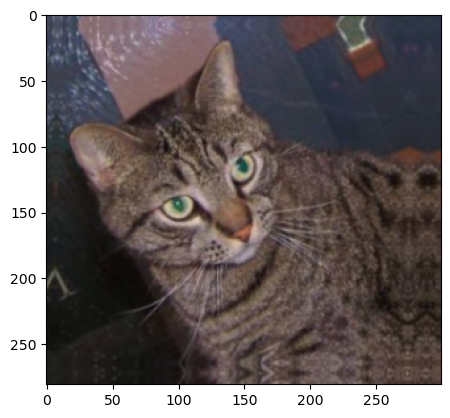

In [ ]:
# import matplotlib.pyplot as plt
# %matplotlib inline
# data_augmentation = tf.keras.Sequential([
#     layers.Rescaling(1./255),                     # Equivalent to rescale=1/255
#     layers.RandomFlip("horizontal"),              # Equivalent to horizontal_flip=True
#     layers.RandomRotation(0.0833),                # 30 degrees / 360 = ~0.0833
#     layers.RandomTranslation(0.1, 0.1),           # width/height_shift_range=0.1
#     layers.RandomZoom(0.2),                       # zoom_range=0.2
#     layers.RandomShear(0.2, fill_mode='nearest')  # shear_range=0.2 (requires TensorFlow 2.14+)
# ])
# c=cv2.imread(r'D:\zaynu\Documents\pythonfiles\CV_mod\cats_and_dgos\CATS_DOGS\train\CAT\1.jpg')
# c=cv2.cvtColor(c,cv2.COLOR_BGR2RGB)
# plt.imshow(data_augmentation(c))
# plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import cv2
# %matplotlib inline
# train_ds = tf.keras.utils.image_dataset_from_directory(
#     r"D:\zaynu\Documents\pythonfiles\CV_mod\cats_and_dgos\CATS_DOGS\train",
#     image_size=(224, 224),
#     batch_size=32
# )

In [ ]:
import tensorflow as tf
from keras import layers


# Define the augmentation pipeline
def augment_dataset(dataset):
    # Define data augmentation as a keras Sequential block
    data_augmentation = tf.keras.Sequential([
        layers.Rescaling(1./255),                     # Equivalent to rescale=1/255
        layers.RandomFlip("horizontal"),              # Equivalent to horizontal_flip=True
        layers.RandomRotation(0.0833),                # 30 degrees / 360 = ~0.0833
        layers.RandomTranslation(0.1, 0.1),           # width/height_shift_range=0.1
        layers.RandomZoom(0.2),                       # zoom_range=0.2
        layers.RandomShear(0.2, fill_mode='nearest')  # shear_range=0.2 (requires TensorFlow 2.14+)
    ])

    # Apply the augmentation to the dataset using map()
    return dataset.map(lambda x, y: (data_augmentation(x, training=True), y), 
                       num_parallel_calls=tf.data.AUTOTUNE)
    
    
train_ds = tf.keras.utils.image_dataset_from_directory(
    "path_to_train",
    image_size=(224, 224),
    batch_size=32
)

train_ds = augment_dataset(train_ds)

In [1]:
from keras import Sequential
from keras.layers import Conv2D,Dense,MaxPooling2D,Flatten,Dropout,Input,Activation

In [2]:
model=Sequential()
model.add(Input(shape=(150,150,3)))
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [3]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,367,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,424,065 (9.25 MB)

 Trainable params: 2,424,065 (9.25 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
batchsize=16
import tensorflow as tf
from keras import layers


# Define the augmentation pipeline
def augment_dataset(dataset):
    # Define data augmentation as a keras Sequential block
    data_augmentation = tf.keras.Sequential([
        layers.Rescaling(1./255),                     # Equivalent to rescale=1/255
        layers.RandomFlip("horizontal"),              # Equivalent to horizontal_flip=True
        layers.RandomRotation(0.0833),                # 30 degrees / 360 = ~0.0833
        layers.RandomTranslation(0.1, 0.1),           # width/height_shift_range=0.1
        layers.RandomZoom(0.2),                       # zoom_range=0.2
        layers.RandomShear(0.2, fill_mode='nearest')  # shear_range=0.2 (requires TensorFlow 2.14+)
    ])

    # Apply the augmentation to the dataset using map()
    return dataset.map(lambda x, y: (data_augmentation(x, training=True), y), 
                       num_parallel_calls=tf.data.AUTOTUNE)
    
    
train_image_gen = tf.keras.utils.image_dataset_from_directory(
    r"D:\zaynu\Documents\pythonfiles\CV_mod\cats_and_dgos\CATS_DOGS\train",
    label_mode='binary',
    image_size=(150,150,3)[:2],
    
    batch_size=batchsize,
)

train_image_gen = augment_dataset(train_image_gen)

test_image_gen = tf.keras.utils.image_dataset_from_directory(
    r"D:\zaynu\Documents\pythonfiles\CV_mod\cats_and_dgos\CATS_DOGS\test",
    label_mode='binary',
    image_size=(150,150,3)[:2],
    batch_size=batchsize,
)

# test_image_gen = augment_dataset(test_image_gen)

train_image_gen = train_image_gen.prefetch(buffer_size=tf.data.AUTOTUNE)
test_image_gen = test_image_gen.prefetch(buffer_size=tf.data.AUTOTUNE)

results=model.fit(
train_image_gen,epochs=15,steps_per_epoch=150,validation_data=test_image_gen,validation_steps=12)


Found 18743 files belonging to 2 classes.
Found 6251 files belonging to 2 classes.
Epoch 1/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 24s 137ms/step - accuracy: 0.5212 - loss: 0.7065 - val_accuracy: 0.5156 - val_loss: 0.6913
Epoch 2/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 20s 134ms/step - accuracy: 0.5124 - loss: 0.6932 - val_accuracy: 0.5104 - val_loss: 0.8370
Epoch 3/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 21s 138ms/step - accuracy: 0.5075 - loss: 0.6907 - val_accuracy: 0.4896 - val_loss: 0.6962
Epoch 4/15
 16/150 ━━━━━━━━━━━━━━━━━━━━ 20s 153ms/step - accuracy: 0.5539 - loss: 0.6855

InvalidArgumentError: Graph execution error:

Detected at node decode_image/DecodeImage defined at (most recent call last):
<stack traces unavailable>
Input size should match (header_size + row_size * abs_height) but they differ by 2
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]] [Op:__inference_multi_step_on_iterator_2761]

In [ ]:
test_image_gen = tf.keras.utils.image_dataset_from_directory(
    r"D:\zaynu\Documents\pythonfiles\CV_mod\cats_and_dgos\CATS_DOGS\test",
    label_mode='binary',
    image_size=(150,150,3)[:2],
    batch_size=batchsize,
)

test_image_gen = augment_dataset(test_image_gen)

results=model.fit(
train_image_gen,epochs=15,steps_per_epoch=150,validation_data=test_image_gen,validation_steps=12)

Found 6251 files belonging to 2 classes.


: 

In [ ]:
results=model.fit(
train_image_gen,epochs=15,steps_per_epoch=150,validation_data=test_image_gen,validation_steps=12)

Epoch 1/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.5001 - loss: 0.7315

InvalidArgumentError: Graph execution error:

Detected at node decode_image/DecodeImage defined at (most recent call last):
<stack traces unavailable>
Number of channels inherent in the image must be 1, 3 or 4, was 2
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]] [Op:__inference_multi_step_on_iterator_33019]